# CPPI and Glide Path simulation

First we are going to build the CPPI simulation

In [63]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
np.random.seed(100)

For CPPI simulation, we assume stock follow Geometric Brownian Motion and The time step(dt) for GBM is the same as the rebalance interval. The initial wealth is in the form of cash. Profit and Loss = log(final portfolio value/initial portfolio value)

对于CPPI模拟，我们假设股票遵循几何布朗运动并且几何布朗运动的时间步长等于调整间隔。最初的财富是以现金的形式存在的。收益与损失的计算方式为
log(最终的投资组合的价值/初始的投资组合的价值)

In [64]:
T = 2.0   #T is the investment horizon (投资时间维度)
sigma = 0.25 # stock volatility (股票的波动率)
mu = 0.1 #real world drift ()
r = 0.02 # the return rate for Bond (债券的回报率)
delt = 1/250 # rebalancing interval (调整间隔)
S_0 = 100 #initial stock price (初始股价)
i_w = 100 #initial wealth (初始财富)

mean: 0.13724616061313713 std: 0.35249431608781123 VAR: -0.4414540485446001 cVAR: -0.5879377276673856


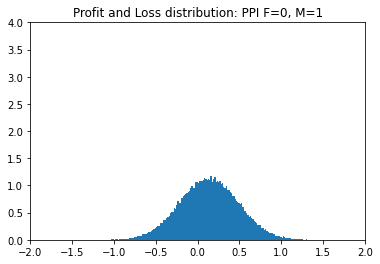

In [65]:
F = 0
M = 1
S = np.ones(80000)*S_0
alpha = (M * np.maximum(0, i_w + 0 - F))/S
B = i_w - (alpha-0)*S_0
portfolio_0 = B + alpha*S
portfolio = B + alpha*S

for i in np.arange(0 + delt, T, delt):
    S = S * np.exp((mu-np.square(sigma)/2)*delt + sigma*np.sqrt(delt)*np.random.normal(0, 1, 80000))
    old_alpha = alpha
    alpha = (M*np.maximum(0, B*np.exp(r*delt) + old_alpha*S - F))/S
    B = B*np.exp(r*delt) - (alpha-old_alpha)*S
    portfolio = B + alpha*S

S = S * np.exp((mu-np.square(sigma)/2)*delt + sigma*np.sqrt(delt)*np.random.normal(0, 1, 80000))
portfolio = B*np.exp(r*delt) + alpha*S
Rs1 = np.log(portfolio/portfolio_0) 
mean1 = np.mean(Rs1)
std1 = np.std(Rs1)

VAR1 = np.quantile(Rs1, 0.05)
less_VAR1 = list(filter(lambda x: x < VAR1, Rs1))
cVAR1 = np.mean(less_VAR1)
print('mean:',mean1,'std:',std1,'VAR:',VAR1, 'cVAR:', cVAR1)

plt.hist(Rs1, bins = 200, density = True)
plt.title("Profit and Loss distribution: PPI F=0, M=1")
plt.xlim(-2,2)
plt.ylim(0,4)
plt.show()

mean: 0.10487039237163558 std: 0.1768161770165806 VAR: -0.18513463974227357 cVAR: -0.25867957384412105


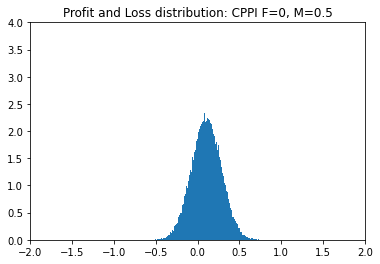

In [66]:
F = 0
M = 0.5
S = np.ones(80000)*S_0
alpha = (M * np.maximum(0, i_w + 0 - F))/S
B = i_w - (alpha-0)*S_0
portfolio_0 = B + alpha*S
portfolio = B + alpha*S
for i in np.arange(0 + delt, T, delt):
    S = S * np.exp((mu-np.square(sigma)/2)*delt + sigma*np.sqrt(delt)*np.random.normal(0, 1, 80000))
    old_alpha = alpha
    alpha = (M*np.maximum(0, B*np.exp(r*delt) + old_alpha*S - F))/S
    B = B*np.exp(r*delt) - (alpha-old_alpha)*S
    portfolio = B + alpha*S
    
S = S * np.exp((mu-np.square(sigma)/2)*delt + sigma*np.sqrt(delt)*np.random.normal(0, 1, 80000))
portfolio = B*np.exp(r*delt) + alpha*S
Rs2 = np.log(portfolio/portfolio_0)
mean2 = np.mean(Rs2)
std2 = np.std(Rs2)
VAR2 = np.quantile(Rs2, 0.05)
less_VAR2 = list(filter(lambda x: x < VAR2, Rs2))
cVAR2 = np.mean(less_VAR2)
print('mean:',mean2,'std:',std2,'VAR:',VAR2, 'cVAR:', cVAR2)

plt.hist(Rs2, bins = 200, density = True)
plt.title("Profit and Loss distribution: CPPI F=0, M=0.5")
plt.xlim(-2,2)
plt.ylim(0,4)
plt.show()

mean: 0.10897402767238731 std: 0.7076236063954616 VAR: -1.0528140333841165 cVAR: -1.3437185897612078


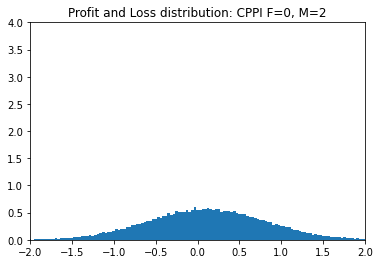

In [67]:
F = 0
M = 2
S = np.ones(80000)*S_0
alpha = (M * np.maximum(0, i_w + 0 - F))/S
B = i_w - (alpha-0)*S_0
portfolio_0 = B + alpha*S
portfolio = B + alpha*S

for i in np.arange(0 + delt, T, delt):
    S = S * np.exp((mu-np.square(sigma)/2)*delt + sigma*np.sqrt(delt)*np.random.normal(0, 1, 80000))
    old_alpha = alpha
    alpha = (M*np.maximum(0, B*np.exp(r*delt) + old_alpha*S - F))/S
    B = B*np.exp(r*delt) - (alpha-old_alpha)*S
    portfolio = B + alpha*S

S = S * np.exp((mu-np.square(sigma)/2)*delt + sigma*np.sqrt(delt)*np.random.normal(0, 1, 80000))
portfolio = B*np.exp(r*delt) + alpha*S
Rs3 = np.log(portfolio/portfolio_0)
mean3 = np.mean(Rs3)
std3 = np.std(Rs3)
VAR3 = np.quantile(Rs3, 0.05)
less_VAR3 = list(filter(lambda x: x < VAR3, Rs3))
cVAR3 = np.mean(less_VAR3)
print('mean:',mean3,'std:',std3, 'VAR:',VAR3, 'cVAR:', cVAR3)

plt.hist(Rs3, bins = 200, density = True)
plt.title("Profit and Loss distribution: CPPI F=0, M=2")
plt.xlim(-2,2)
plt.ylim(0,4)
plt.show()

mean: 0.09869449259086172 std: 0.1850969631342551 VAR: -0.11624694032668888 cVAR: -0.13712566658333206


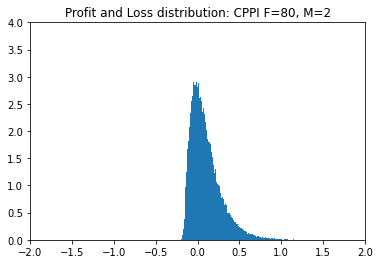

In [68]:
F = 80
M = 2
S = np.ones(80000)*S_0
alpha = (M * np.maximum(0, i_w + 0 - F))/S
B = i_w - (alpha-0)*S_0
portfolio_0 = B + alpha*S
portfolio = B + alpha*S

for i in np.arange(0 + delt, T, delt):
    S = S * np.exp((mu-np.square(sigma)/2)*delt + sigma*np.sqrt(delt)*np.random.normal(0, 1, 80000))
    old_alpha = alpha
    alpha = (M*np.maximum(0, B*np.exp(r*delt) + old_alpha*S - F))/S
    B = B*np.exp(r*delt) - (alpha-old_alpha)*S
    portfolio = B + alpha*S
    
S = S * np.exp((mu-np.square(sigma)/2)*delt + sigma*np.sqrt(delt)*np.random.normal(0, 1, 80000))
portfolio = B*np.exp(r*delt) + alpha*S
Rs4 = np.log(portfolio/portfolio_0)
mean4 = np.mean(Rs4)
std4 = np.std(Rs4)
VAR4 = np.quantile(Rs4, 0.05)
less_VAR4 = list(filter(lambda x: x < VAR4, Rs4))
cVAR4 = np.mean(less_VAR4)
print('mean:',mean4, 'std:',std4,'VAR:',VAR4, 'cVAR:', cVAR4)

plt.hist(Rs4, bins = 200, density = True)
plt.title("Profit and Loss distribution: CPPI F=80, M=2")
plt.xlim(-2,2)
plt.ylim(0,4)
plt.show()

mean: 0.11112291532695066 std: 0.3779350103496627 VAR: -0.19095511739768903 cVAR: -0.20024340165395232


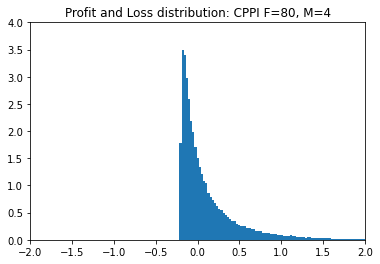

In [69]:
F = 80
M = 4
S = np.ones(80000)*S_0
alpha = (M * np.maximum(0, i_w + 0 - F))/S
B = i_w - (alpha-0)*S_0
portfolio_0 = B + alpha*S
portfolio = B + alpha*S

for i in np.arange(0 + delt, T, delt):
    S = S * np.exp((mu-np.square(sigma)/2)*delt + sigma*np.sqrt(delt)*np.random.normal(0, 1, 80000))
    old_alpha = alpha
    alpha = (M*np.maximum(0, B*np.exp(r*delt) + old_alpha*S - F))/S
    B = B*np.exp(r*delt) - (alpha-old_alpha)*S
    portfolio = B + alpha*S

S = S * np.exp((mu-np.square(sigma)/2)*delt + sigma*np.sqrt(delt)*np.random.normal(0, 1, 80000))
portfolio = B*np.exp(r*delt) + alpha*S
Rs5 = np.log(portfolio/portfolio_0)
mean5 = np.mean(Rs5)
std5 = np.std(Rs5)
VAR5 = np.quantile(Rs5, 0.05)
less_VAR5 = list(filter(lambda x: x < VAR5, Rs5))
cVAR5 = np.mean(less_VAR5)
print('mean:',mean5, 'std:',std5,'VAR:',VAR5, 'cVAR:', cVAR5)

plt.hist(Rs5, bins = 200, density = True)
plt.title("Profit and Loss distribution: CPPI F=80, M=4")
plt.xlim(-2,2)
plt.ylim(0,4)
plt.show()

Then, we are going to biuld the Glide Path simulation

First, we are going to use the curve y = (-1/2)x + 1

Text(0.5, 1.0, 'The first ratio curve we are going to use')

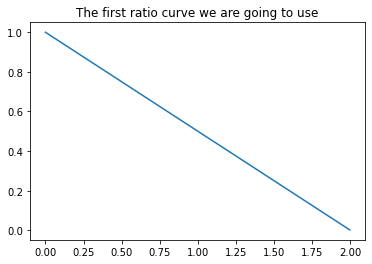

In [70]:
def ratio1(t):
    p = - (1/2) * t + 1
    return p

x = np.arange(0, T, delt)
y = ratio1(x)
plt.plot(x, y)
plt.title("The first ratio curve we are going to use")

mean: -0.09875790721309409 std: 0.2055980005114397 VAR: -0.4360407775394451 cVAR: -0.5233918506235055


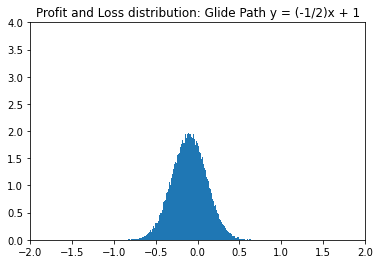

In [71]:
portfolio_0 = i_w * np.ones(80000)
S = np.ones(80000)*S_0
alpha = ratio1(0)*portfolio_0/S
B = portfolio_0 - alpha*S

for i in np.arange(0 + delt, T, delt):
    S = S * np.exp((mu-np.square(sigma)/2)*delt + sigma*np.sqrt(delt)*np.random.normal(0, 1, 80000))
    old_alpha = alpha
    portfolio_changed = B*np.exp(r*delt) + old_alpha * S
    alpha = (ratio1(i) * portfolio_changed)/S
    B = portfolio_changed - alpha*S

S = S * np.exp((mu-np.square(sigma)/2)*delt + sigma*np.sqrt(delt)*np.random.normal(0, 1, 80000))
portfolio = B*np.exp(r*delt) + alpha*S
Rs6 = np.log(portfolio_0/portfolio)
mean6 = np.mean(Rs6)
std6 = np.std(Rs6)
VAR6 = np.quantile(Rs6, 0.05)
less_VAR6 = list(filter(lambda x: x < VAR6, Rs6))
cVAR6 = np.mean(less_VAR6)
print('mean:',mean6,'std:',std6, 'VAR:',VAR6, 'cVAR:', cVAR6)

plt.hist(Rs6, bins = 200, density = True)
plt.title("Profit and Loss distribution: Glide Path y = (-1/2)x + 1")
plt.xlim(-2,2)
plt.ylim(0,4)
plt.show()    

Then, we are going to use the second ratio curve y = (1/2) x

Text(0.5, 1.0, 'The second ratio curve we are going to use')

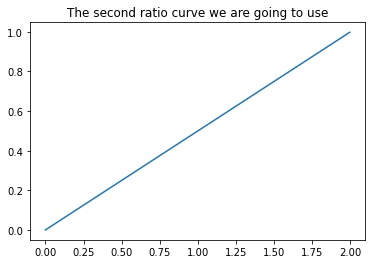

In [72]:
def ratio2(t):
    p = (1/2) * t
    return p

x = np.arange(0, T, delt)
y = ratio2(x)
plt.plot(x, y)
plt.title("The second ratio curve we are going to use")

mean: -0.09992930744788027 std: 0.20364934212119581 VAR: -0.4342904081462492 cVAR: -0.5184321293381328


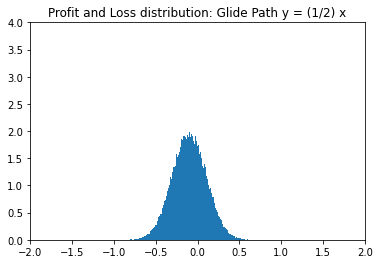

In [73]:
portfolio_0 = i_w * np.ones(80000)
S = np.ones(80000)*S_0
alpha = ratio2(0)*portfolio_0/S
B = portfolio_0 - alpha*S

for i in np.arange(0 + delt, T, delt):
    S = S * np.exp((mu-np.square(sigma)/2)*delt + sigma*np.sqrt(delt)*np.random.normal(0, 1, 80000))
    old_alpha = alpha
    portfolio_changed = B*np.exp(r*delt) + old_alpha * S
    alpha = (ratio2(i) * portfolio_changed)/S
    B = portfolio_changed - alpha*S

S = S * np.exp((mu-np.square(sigma)/2)*delt + sigma*np.sqrt(delt)*np.random.normal(0, 1, 80000))
portfolio = B*np.exp(r*delt) + alpha*S
Rs7 = np.log(portfolio_0/portfolio)
mean7 = np.mean(Rs7)
std7 = np.std(Rs7)
VAR7 = np.quantile(Rs7, 0.05)
less_VAR7 = list(filter(lambda x: x < VAR7, Rs7))
cVAR7 = np.mean(less_VAR7)
print('mean:',mean7,'std:',std7, 'VAR:',VAR7, 'cVAR:', cVAR7)

plt.hist(Rs7, bins = 200, density = True)
plt.title("Profit and Loss distribution: Glide Path y = (1/2) x")
plt.xlim(-2,2)
plt.ylim(0,4)
plt.show()

Then, we are going to use the third ratio cuve, a constant ratio cruve, y = 2/3

Text(0.5, 1.0, 'The third ratio curve we are going to use')

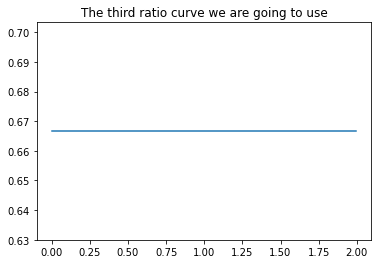

In [74]:
def ratio3(t):
    p = 2/3
    return p

x = np.arange(0, T, delt)
y = list(map(ratio3, x))
plt.plot(x, y)
plt.title("The third ratio curve we are going to use")

mean: -0.1190933098886756 std: 0.23635679611333865 VAR: -0.5096171324051124 cVAR: -0.6056313444693388


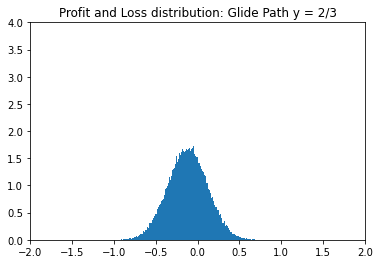

In [75]:
portfolio_0 = i_w * np.ones(80000)
S = np.ones(80000)*S_0
alpha = ratio3(0)*portfolio_0/S
B = portfolio_0 - alpha*S

for i in np.arange(0 + delt, T, delt):
    S = S * np.exp((mu-np.square(sigma)/2)*delt + sigma*np.sqrt(delt)*np.random.normal(0, 1, 80000))
    old_alpha = alpha
    portfolio_changed = B*np.exp(r*delt) + old_alpha * S
    alpha = (ratio3(i) * portfolio_changed)/S
    B = portfolio_changed - alpha*S

S = S * np.exp((mu-np.square(sigma)/2)*delt + sigma*np.sqrt(delt)*np.random.normal(0, 1, 80000))
portfolio = B*np.exp(r*delt) + alpha*S
Rs8 = np.log(portfolio_0/portfolio)
mean8 = np.mean(Rs8)
std8 = np.std(Rs8)
VAR8 = np.quantile(Rs8, 0.05)
less_VAR8 = list(filter(lambda x: x < VAR8, Rs8))
cVAR8 = np.mean(less_VAR8)
print('mean:',mean8, 'std:',std8,'VAR:',VAR8, 'cVAR:', cVAR8)

plt.hist(Rs8, bins = 200, density = True)
plt.title("Profit and Loss distribution: Glide Path y = 2/3")
plt.xlim(-2,2)
plt.ylim(0,4)
plt.show()

For the final curve, we are going to use y = (1/4) x^2

Text(0.5, 1.0, 'The final ratio curve we are going to use')

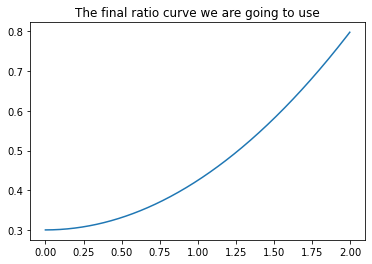

In [76]:
def ratio4(t):
    p = (1/8) * np.square(t) + 0.3
    return p

x = np.arange(0, T, delt)
y = ratio4(x)
plt.plot(x, y)
plt.title("The final ratio curve we are going to use")

mean: -0.10028400901717585 std: 0.17315580577901635 VAR: -0.38457206800651406 cVAR: -0.4557371706308459


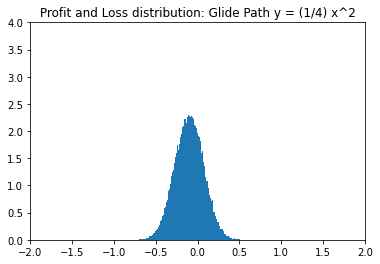

In [77]:
portfolio_0 = i_w * np.ones(80000)
S = np.ones(80000)*S_0
alpha = ratio4(0)*portfolio_0/S
B = portfolio_0 - alpha*S

for i in np.arange(0 + delt, T, delt):
    S = S * np.exp((mu-np.square(sigma)/2)*delt + sigma*np.sqrt(delt)*np.random.normal(0, 1, 80000))
    old_alpha = alpha
    portfolio_changed = B*np.exp(r*delt) + old_alpha * S
    alpha = (ratio4(i) * portfolio_changed)/S
    B = portfolio_changed - alpha*S

S = S * np.exp((mu-np.square(sigma)/2)*delt + sigma*np.sqrt(delt)*np.random.normal(0, 1, 80000))
portfolio = B*np.exp(r*delt) + alpha*S
Rs9 = np.log(portfolio_0/portfolio)
mean9 = np.mean(Rs9)
std9 = np.std(Rs9)
VAR9 = np.quantile(Rs9, 0.05)
less_VAR9 = list(filter(lambda x: x < VAR9, Rs9))
cVAR9 = np.mean(less_VAR9)
print('mean:',mean9, 'std:',std9,'VAR:',VAR9, 'cVAR:', cVAR9)

plt.hist(Rs9, bins = 200, density = True)
plt.title("Profit and Loss distribution: Glide Path y = (1/4) x^2")
plt.xlim(-2,2)
plt.ylim(0,4)
plt.show()

Comparsion: We can compare the profit and loss distrbution for different strategies. First of all, we rejected all glide path strategies since the mean P&L for all glide path strategies is negative. If the investors are insensitve for risk and eager for high return, CPPI F=0 M=2 will be the best choice since the strategy has high std and the P&L is likely to reach 2.0. If the investors is highly risk sensitive, then CPPI F=80 M=2 is the best choice. Because the strategy has low std and lowest VAR, which means the loss of worst scenario will not be huge. If the investor is neutral about risk, CPPI F=0 M=0 may be a good choice since the strategy has highest mean and moderate std.

比较：我们比较不同的策略的收益与损失分布。首先，我们拒绝了所有的glide path策略因为所有的glide path策略的平均收益与损失为负。如果投资者
对于风险不敏感并且追求高回报，CPPI F=0 M=2 会是最好的选择因为这个策略有很高的标准差并且收益可能能达到2.0. 如果投资者对于风险高度敏感，那么CPPI F=80 M=2会是最好的选择。因为这个策略有低的标准差和最低的VAR值，这就意味着最差情况的损失不会很大。如果投资者对于风险是中性的，CPPI F=0 M=0可能会是一个好的选择因为这个策略有最高的收益平均值和中等的标准差。